<a href="https://colab.research.google.com/github/EmnaRajhi/EmnaRajhi/blob/main/TunisieT%C3%A9l%C3%A9com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing des Données


# `***Importation des librairies ***`

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

***

```
# Preprocessing des données 
```

***

In [ ]:
#lire les données
df= pd.read_excel('DATAWAREHOUSE.xlsx')

In [ ]:
#voir nombres des lignes et des colonnes ==> les dimensions
df.shape

(1977, 19)

In [ ]:
#afficher les noms des colonnes
df.columns

Index(['Date', 'Cle 3G Prepaye', 'Corporate Optimum Plus', 'Forfait SELECT',
       'Hayya', 'M2M', 'Netbox 4G DataOnly', 'Nouvelle Offre Dimanet 4G',
       'Oh!Méga', 'PRE - Pass Etudiant', 'PRE - Po9', 'PRE - Trankil TT',
       'Privilège', 'Unnamed: 13', 'Unnamed: 14', 'Hayya.1', 'PRE - Po9.1',
       'PRE - TM 35mil/min', 'PRE - Trankil TT.1'],
      dtype='object')

In [ ]:
#afficher les nombres des valeurs uniques
df.nunique()

Date                         1977
Cle 3G Prepaye                 10
Corporate Optimum Plus         11
Forfait SELECT                 10
Hayya                           9
M2M                            10
Netbox 4G DataOnly             10
Nouvelle Offre Dimanet 4G      11
Oh!Méga                         6
PRE - Pass Etudiant            10
PRE - Po9                       5
PRE - Trankil TT                8
Privilège                      10
Hayya.1                         6
PRE - Po9.1                    10
PRE - TM 35mil/min              5
PRE - Trankil TT.1              8
dtype: int64

In [ ]:
#afficher  di il ya des cellules nulls et les types des données
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       1977 non-null   datetime64[ns]
 1   Cle 3G Prepaye             1977 non-null   int64         
 2   Corporate Optimum Plus     1977 non-null   int64         
 3   Forfait SELECT             1977 non-null   int64         
 4   Hayya                      1977 non-null   int64         
 5   M2M                        1977 non-null   int64         
 6   Netbox 4G DataOnly         1977 non-null   int64         
 7   Nouvelle Offre Dimanet 4G  1977 non-null   int64         
 8   Oh!Méga                    1977 non-null   int64         
 9   PRE - Pass Etudiant        1977 non-null   int64         
 10  PRE - Po9                  1977 non-null   int64         
 11  PRE - Trankil TT           1977 non-null   int64         
 12  Privil

**On a trouver 2 colonnes vides d'ou la neceessité de les supprimer**

In [ ]:
# effacer les colonnes avec aux moins une valeur null
df= df.dropna(axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       1977 non-null   datetime64[ns]
 1   Cle 3G Prepaye             1977 non-null   int64         
 2   Corporate Optimum Plus     1977 non-null   int64         
 3   Forfait SELECT             1977 non-null   int64         
 4   Hayya                      1977 non-null   int64         
 5   M2M                        1977 non-null   int64         
 6   Netbox 4G DataOnly         1977 non-null   int64         
 7   Nouvelle Offre Dimanet 4G  1977 non-null   int64         
 8   Oh!Méga                    1977 non-null   int64         
 9   PRE - Pass Etudiant        1977 non-null   int64         
 10  PRE - Po9                  1977 non-null   int64         
 11  PRE - Trankil TT           1977 non-null   int64         
 12  Privil

In [ ]:
#ajouter la 2éme partie des données (partie Technique)
df2=pd.read_excel("database2.xlsx")


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 1977 non-null   datetime64[ns]
 1   FIXE                 1977 non-null   int64         
 2   ADSL                 1977 non-null   int64         
 3   Taux de pénetration  1977 non-null   int64         
 4   FO internet          1977 non-null   int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 77.4 KB


In [ ]:
df2.columns

Index(['Date', 'FIXE ', 'ADSL ', 'Taux de pénetration', 'FO internet '], dtype='object')

In [ ]:
df2.nunique()

Date                   1977
FIXE                     10
ADSL                      5
Taux de pénetration       8
FO internet              13
dtype: int64

In [ ]:
df2.head()

,Date,FIXE,ADSL,Taux de pénetration,FO internet
0,2015-01-01,1,1,1,6
1,2015-01-02,22,22,22,0
2,2015-01-03,0,0,0,1
3,2015-01-04,0,0,0,22
4,2015-01-05,0,0,0,0


 # Data processing Partie Comerciale 

In [ ]:
#afficher le max de chaque colonne
df.max()


Date                         2020-05-30 00:00:00
Cle 3G Prepaye                               357
Corporate Optimum Plus                       357
Forfait SELECT                               357
Hayya                                        357
M2M                                          357
Netbox 4G DataOnly                           357
Nouvelle Offre Dimanet 4G                    357
Oh!Méga                                       25
PRE - Pass Etudiant                          357
PRE - Po9                                     25
PRE - Trankil TT                              25
Privilège                                    357
Unnamed: 13                                  NaN
Unnamed: 14                                  NaN
Hayya.1                                       25
PRE - Po9.1                                  357
PRE - TM 35mil/min                            25
PRE - Trankil TT.1                            25
dtype: object

In [ ]:
#afficher l ID de chaque max par colonne
df.idxmax()

Date                         1976
Cle 3G Prepaye                  9
Corporate Optimum Plus          9
Forfait SELECT                 10
Hayya                          12
M2M                            14
Netbox 4G DataOnly             12
Nouvelle Offre Dimanet 4G      18
Oh!Méga                         5
PRE - Pass Etudiant            23
PRE - Po9                       5
PRE - Trankil TT                5
Privilège                      15
Hayya.1                         5
PRE - Po9.1                    23
PRE - TM 35mil/min              5
PRE - Trankil TT.1              5
dtype: int64

In [ ]:
#donne la moyenne des colonnes , le min le max ..
df.describe()

,Cle 3G Prepaye,Corporate Optimum Plus,Forfait SELECT,Hayya,M2M,Netbox 4G DataOnly,Nouvelle Offre Dimanet 4G,Oh!Méga,PRE - Pass Etudiant,PRE - Po9,PRE - Trankil TT,Privilège,Unnamed: 13,Unnamed: 14,Hayya.1,PRE - Po9.1,PRE - TM 35mil/min,PRE - Trankil TT.1
count,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,0.0,0.0,1977.000000,1977.000000,1977.000000,1977.000000
mean,30.952959,31.100658,44.245827,19.300455,20.020738,18.794133,17.792615,6.823976,19.498230,6.574608,6.196257,18.824482,NaN,NaN,6.823976,19.498230,6.574608,6.196257
std,92.590596,92.535076,110.785113,66.729140,66.602118,66.751690,66.756874,9.454578,66.680413,9.582458,8.903891,66.742670,NaN,NaN,9.454578,66.680413,9.582458,8.903891
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000
75%,10.000000,10.000000,10.000000,10.000000,14.000000,10.000000,8.000000,10.000000,14.000000,10.000000,10.000000,10.000000,NaN,NaN,10.000000,14.000000,10.000000,10.000000
max,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,25.000000,357.000000,25.000000,25.000000,357.000000,NaN,NaN,25.000000,357.000000,25.000000,25.000000


Une matrice de corrélation est un tableau contenant des coefficients de corrélation entre des variables. Chaque cellule du tableau représente la corrélation entre deux variables. La valeur se situe entre -1 et 1.

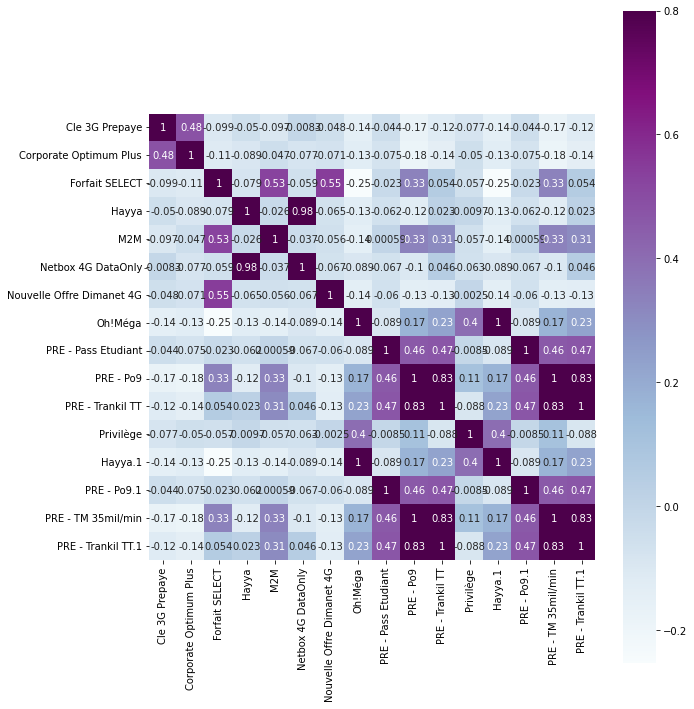

In [ ]:
# correlation des variables numérique 
matrix=df.corr()
f,ax=plt.subplots(figsize=(10,12))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu',annot=True)

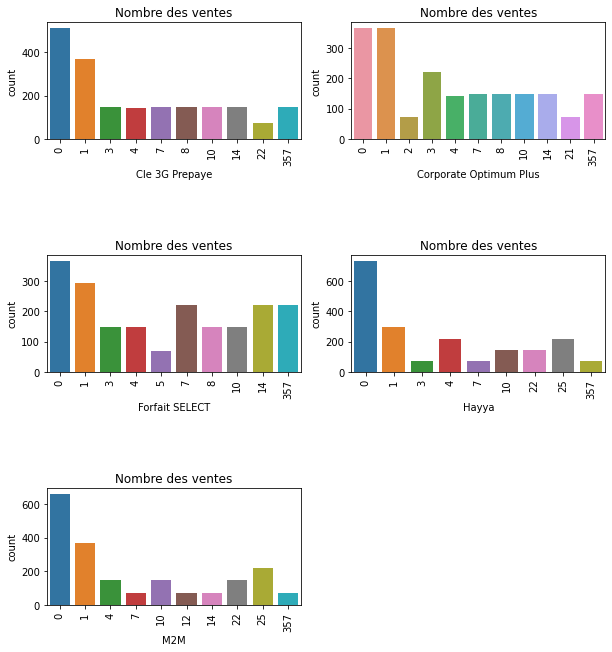

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
fig=plt.subplots(figsize=(10,15))
features=['Cle 3G Prepaye', 'Corporate Optimum Plus', 'Forfait SELECT','Hayya', 'M2M']
for i, j in enumerate(features):
     plt.subplot(4, 2, i+1)
     plt.subplots_adjust(hspace = 1.0)
     sns.countplot(x=j,data = df)
     plt.xticks(rotation=90)
     plt.title("Nombre des ventes")

In [ ]:
#concaténation du 1ére partie ( partie commerciales ) avec la 2éme partie (technique)
df3=pd.concat([df1,df2])
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3954 entries, 0 to 1976
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       1977 non-null   datetime64[ns]
 1   Cle 3G Prepaye             1977 non-null   float64       
 2   Corporate Optimum Plus     1977 non-null   float64       
 3   Forfait SELECT             1977 non-null   float64       
 4   Hayya                      1977 non-null   float64       
 5   M2M                        1977 non-null   float64       
 6   Netbox 4G DataOnly         1977 non-null   float64       
 7   Nouvelle Offre Dimanet 4G  1977 non-null   float64       
 8   Oh!Méga                    1977 non-null   float64       
 9   PRE - Pass Etudiant        1977 non-null   float64       
 10  PRE - Po9                  1977 non-null   float64       
 11  PRE - Trankil TT           1977 non-null   float64       
 12  Privil

In [ ]:

df3.head()

,Date,Cle 3G Prepaye,Corporate Optimum Plus,Forfait SELECT,Hayya,M2M,Netbox 4G DataOnly,Nouvelle Offre Dimanet 4G,Oh!Méga,PRE - Pass Etudiant,...,PRE - Trankil TT,Privilège,Hayya.1,PRE - Po9.1,PRE - TM 35mil/min,PRE - Trankil TT.1,FIXE,ADSL,Taux de pénetration,FO internet
0,2015-01-01,4.0,4.0,5.0,3.0,12.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
1,2015-01-02,10.0,10.0,4.0,1.0,1.0,22.0,1.0,22.0,22.0,...,22.0,22.0,22.0,22.0,22.0,22.0,NaN,NaN,NaN,NaN
2,2015-01-03,8.0,8.0,10.0,22.0,22.0,0.0,22.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2015-01-04,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2015-01-05,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
df3.fillna(0)

,Date,Cle 3G Prepaye,Corporate Optimum Plus,Forfait SELECT,Hayya,M2M,Netbox 4G DataOnly,Nouvelle Offre Dimanet 4G,Oh!Méga,PRE - Pass Etudiant,...,PRE - Trankil TT,Privilège,Hayya.1,PRE - Po9.1,PRE - TM 35mil/min,PRE - Trankil TT.1,FIXE,ADSL,Taux de pénetration,FO internet
0,2015-01-01 00:00:00,4.0,4.0,5.0,3.0,12.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,2015-01-02 00:00:00,10.0,10.0,4.0,1.0,1.0,22.0,1.0,22.0,22.0,...,22.0,22.0,22.0,22.0,22.0,22.0,0.0,0.0,0.0,0.0
2,2015-01-03 00:00:00,8.0,8.0,10.0,22.0,22.0,0.0,22.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-04 00:00:00,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-05 00:00:00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,10.0,4.0
1973,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0
1974,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1975,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,14.0


In [ ]:
#calculer la somme par colonne
print(df3.sum())

Cle 3G Prepaye               61194.0
Corporate Optimum Plus       61486.0
Forfait SELECT               87474.0
Hayya                        38157.0
M2M                          39581.0
Netbox 4G DataOnly           37156.0
Nouvelle Offre Dimanet 4G    35176.0
Oh!Méga                      13491.0
PRE - Pass Etudiant          38548.0
PRE - Po9                    12998.0
PRE - Trankil TT             12250.0
Privilège                    37216.0
Hayya.1                      13491.0
PRE - Po9.1                  38548.0
PRE - TM 35mil/min           12998.0
PRE - Trankil TT.1           12250.0
FIXE                         38548.0
ADSL                         12998.0
Taux de pénetration          12250.0
FO internet                  11550.0
dtype: float64


In [ ]:
#calculer la somme par ligne
print(df3.sum(axis=1))

0        38.0
1       247.0
2        92.0
3         8.0
4         2.0
        ...  
1972     34.0
1973      6.0
1974      1.0
1975     20.0
1976     52.0
Length: 3954, dtype: float64


In [ ]:
#ajouter la colonne total et la remplir 
#df3["total"]=df3.sum(axis=1)
#print(df1)

In [ ]:
#ajouter la ligne total pour calculer la total par offre
#somme=df1.sum()
#print("somme par colonne:")
#print(somme)
#somme.tolist()

In [ ]:
#df3.append(somme,ignore_index=True)

In [ ]:
print(df["Date"].head(1))
print(df["Date"].tail(1))

0   2015-01-01
Name: Date, dtype: datetime64[ns]
1976   2020-05-30
Name: Date, dtype: datetime64[ns]


In [ ]:
#print(df3["total"])

In [ ]:
#ajouter une colonne pour donner la status des ventes par jour 
#df3['Status'] = ["acceptable" if s >=20 else "innacceptable" for s in df3['total']] 
#print(df3)

In [ ]:
df.fillna(0)

,Date,Cle 3G Prepaye,Corporate Optimum Plus,Forfait SELECT,Hayya,M2M,Netbox 4G DataOnly,Nouvelle Offre Dimanet 4G,Oh!Méga,PRE - Pass Etudiant,PRE - Po9,PRE - Trankil TT,Privilège,Unnamed: 13,Unnamed: 14,Hayya.1,PRE - Po9.1,PRE - TM 35mil/min,PRE - Trankil TT.1
0,2015-01-01,4,4,5,3,12,1,0,1,1,1,1,1,0.0,0.0,1,1,1,1
1,2015-01-02,10,10,4,1,1,22,1,22,22,22,22,22,0.0,0.0,22,22,22,22
2,2015-01-03,8,8,10,22,22,0,22,0,0,0,0,0,0.0,0.0,0,0,0,0
3,2015-01-04,0,0,8,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0
4,2015-01-05,1,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,2020-05-26,1,1,3,25,25,10,25,10,10,10,10,10,0.0,0.0,10,10,10,10
1973,2020-05-27,14,14,1,10,10,1,10,1,1,1,1,1,0.0,0.0,1,1,1,1
1974,2020-05-28,7,7,14,1,1,0,1,0,0,0,0,0,0.0,0.0,0,0,0,0
1975,2020-05-29,357,357,7,0,0,4,0,4,1,1,4,4,0.0,0.0,4,1,1,4


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3954 entries, 0 to 1976
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       1977 non-null   datetime64[ns]
 1   Cle 3G Prepaye             1977 non-null   float64       
 2   Corporate Optimum Plus     1977 non-null   float64       
 3   Forfait SELECT             1977 non-null   float64       
 4   Hayya                      1977 non-null   float64       
 5   M2M                        1977 non-null   float64       
 6   Netbox 4G DataOnly         1977 non-null   float64       
 7   Nouvelle Offre Dimanet 4G  1977 non-null   float64       
 8   Oh!Méga                    1977 non-null   float64       
 9   PRE - Pass Etudiant        1977 non-null   float64       
 10  PRE - Po9                  1977 non-null   float64       
 11  PRE - Trankil TT           1977 non-null   float64       
 12  Privil